![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import collections

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # инструмент для кодирования категориальных признаков

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
43601,id_3285,Prague,NaN,3292.0,NaN,2.0,"[[""DISAPPOINTING FOOD THAT CAN UPSET THE 'SYS....",/Restaurant_Review-g274707-d12447553-Reviews-O...,d12447553,1,3.5
29576,id_6574,Paris,NaN,6575.0,NaN,7.0,"[['Authentic Indian. Worth it', 'Good food'], ...",/Restaurant_Review-g187147-d5778448-Reviews-Pa...,d5778448,1,4.5
1758,id_1758,London,"['Indian', 'Asian', 'Balti', 'Eastern European...",7471.0,$$ - $$$,30.0,"[['Great cooking, proper traditional curry ho....",/Restaurant_Review-g186338-d5244264-Reviews-Ba...,d5244264,0,0.0
44937,id_7829,London,"['Chinese', 'Asian']",7838.0,$,150.0,"[['Just a simpel small chinese restaurant', 'G...",/Restaurant_Review-g186338-d680426-Reviews-Can...,d680426,1,3.5
5473,id_5473,Brussels,NaN,2607.0,NaN,5.0,"[[], []]",/Restaurant_Review-g1156375-d11726490-Reviews-...,d11726490,0,0.0


Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [14]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [15]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [16]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [17]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1574
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

#### Возьмем признак "Price Range".

In [18]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [19]:
# Ваша обработка 'Price Range'
data['Price Range'].fillna((data['Price Range'].mode()[0]), inplace=True)
data['Price Range'].fillna(data['Price Range'].mode()[0], inplace=True)
price_dict = {'$': 1, '$$ - $$$': 2, '$$$$': 3}
data['Price Range'] = data['Price Range'].map(price_dict)
data['Price Range']

0        2
1        2
2        2
3        3
4        3
        ..
49995    2
49996    2
49997    2
49998    2
49999    2
Name: Price Range, Length: 50000, dtype: int64

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### ID_TA


In [20]:
# Просто преобразуем в int и посмотрим что, выдаст
data['ID_TA'] = data['ID_TA'].apply(lambda x: int(x[1:]))

In [21]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN
16673,id_12492,London,NaN,12502.0,2,2.0,"[[], []]",/Restaurant_Review-g186338-d12620594-Reviews-L...,12620594,1,4.0,0
30327,id_10403,Paris,['Greek'],10405.0,2,19.0,"[['Good quality, good service take away', 'Exc...",/Restaurant_Review-g187147-d6995931-Reviews-Ev...,6995931,1,4.0,0
20757,id_1276,Zurich,NaN,1281.0,2,0.0,"[[], []]",/Restaurant_Review-g188113-d11726692-Reviews-L...,11726692,1,4.0,1
23216,id_1588,Lisbon,['Barbecue'],1589.0,2,78.0,"[['Great value and variety', 'Boys day out'], ...",/Restaurant_Review-g189158-d5964538-Reviews-Ch...,5964538,1,3.5,0
25716,id_6699,Paris,"['French', 'European', 'Bar', 'Pub']",6700.0,2,35.0,"[['Busy & Atmospheric', 'Excellent service and...",/Restaurant_Review-g187147-d2434895-Reviews-Le...,2434895,1,4.0,0


Reviews 

In [22]:
# Вытащим из колонки 'Reviews' дату публикаций и создадим новый признак количество дней между отзывами
data['Reviews'][1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

In [23]:
# обработаем колонку Reviews преобразовав данные в список
data['Reviews'] = data.Reviews.dropna().apply(lambda x: eval(x.replace('nan', '').replace('[,', "['',"))) 
data['date'] = data['Reviews'].dropna().apply(lambda x: x[1]) # берем из списка даты
data['date_1'] = data['date'].dropna().apply(lambda x: x[1] if len(x) == 2 else np.nan) # если в списке 2 даты берем вторую
data['date_2'] = data['date'].dropna().apply(lambda x: x[0] if len(x) > 0 else np.nan) # берем первую

In [24]:
data.drop('date', axis = 1, inplace=True) # удалим столбец date 

In [25]:
# переведем в datetime
data['date_1'] = pd.to_datetime(data['date_1'])
data['date_2'] = pd.to_datetime(data['date_2'])

In [26]:
#заполним пропуски средними значениями
data['date_1'].fillna(data['date_1'].mean(), inplace=True)
data['date_2'].fillna(data['date_2'].mean(), inplace=True)

In [27]:
# создадим новый признак количество дней между отзывами
data['days'] = abs(data['date_2'] - data['date_1']).dt.days

In [28]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,date_1,date_2,days
6484,id_6484,Vienna,NaN,1331.0,2,5.0,"[[], []]",/Restaurant_Review-g190454-d10298673-Reviews-L...,10298673,0,0.0,0,2017-02-23 19:43:37.621401344,2017-05-04 06:05:22.819055616,69
42679,id_2085,Barcelona,"['Mediterranean', 'European', 'Spanish', 'Vege...",2086.0,2,1025.0,"[[Salad surprise, Long wait for service], [01/...",/Restaurant_Review-g187497-d1106705-Reviews-Ta...,1106705,1,3.5,0,2017-12-31 00:00:00.000000000,2018-01-03 00:00:00.000000000,3
47346,id_3585,Milan,['Pizza'],3587.0,1,31.0,"[[Great value for money...., Worth finding], [...",/Restaurant_Review-g187849-d5821982-Reviews-Pi...,5821982,1,4.0,0,2014-12-09 00:00:00.000000000,2017-08-30 00:00:00.000000000,995
15744,id_4100,Berlin,['Turkish'],4102.0,2,4.0,"[[Great lentil soup, Turkish pizza and more, B...",/Restaurant_Review-g187323-d2465481-Reviews-Gr...,2465481,1,5.0,0,2012-01-06 00:00:00.000000000,2015-10-03 00:00:00.000000000,1366
12738,id_2252,Rome,"['Italian', 'Mediterranean', 'Vegetarian Frien...",2253.0,1,129.0,"[[Good, Simple and Authentic - Delicious!], [0...",/Restaurant_Review-g187791-d2399619-Reviews-Tr...,2399619,1,4.0,0,2017-05-13 00:00:00.000000000,2017-07-08 00:00:00.000000000,56


In [29]:
# Посчитаем сколько дней прошло с последнего отзыва до наст. времени
def days(day_1, day_2):
    dt_now = pd.datetime.today()
    if not day_1 or not day_2:
      return 0
    if day_1 > day_2:
      return (dt_now - pd.to_datetime(day_1)).days
    return (dt_now - pd.to_datetime(day_2)).days
# Создадим новый признак  - кол-во дней с последнего отзыва
data['days_until_today'] = data[['date_1', 'date_2']].apply(lambda x: days(*x), axis=1)

In [30]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,date_1,date_2,days,days_until_today
38016,id_1171,Paris,"['Brew Pub', 'Moroccan', 'Bar', 'Cafe', 'Medit...",1172.0,1,59.0,"[[Amazing Food and Service, Beautiful Algerian...",/Restaurant_Review-g187147-d10139252-Reviews-C...,10139252,1,5.0,0,2017-10-01 00:00:00.000000000,2017-10-01 00:00:00.000000000,0,1477
24280,id_8000,London,['African'],8009.0,2,10.0,"[[], []]",/Restaurant_Review-g186338-d4610575-Reviews-Jo...,4610575,1,4.5,0,2017-02-23 19:43:37.621401344,2017-05-04 06:05:22.819055616,69,1627
6213,id_6213,Oporto,['Vegetarian Friendly'],715.0,1,18.0,"[[Really nice to travellers!, A very special p...",/Restaurant_Review-g189180-d8425294-Reviews-Es...,8425294,0,0.0,0,2017-07-18 00:00:00.000000000,2017-10-03 00:00:00.000000000,77,1475
41182,id_1432,Edinburgh,NaN,1434.0,2,3.0,"[[Good quality food, Poor quality food. Shoddy...",/Restaurant_Review-g186525-d5423620-Reviews-Go...,5423620,1,4.0,0,2016-07-31 00:00:00.000000000,2017-03-08 00:00:00.000000000,220,1684
18182,id_1950,Stockholm,['Chinese'],1953.0,2,11.0,"[[Proper Chinese home cooking, Overall great],...",/Restaurant_Review-g189852-d7722191-Reviews-Re...,7722191,1,3.0,0,2016-04-09 00:00:00.000000000,2017-08-18 00:00:00.000000000,496,1521


![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

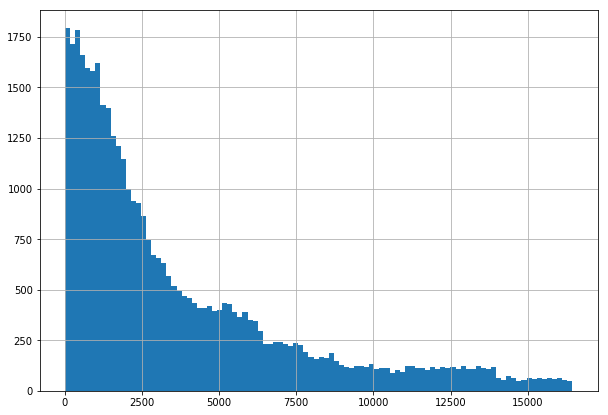

In [31]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

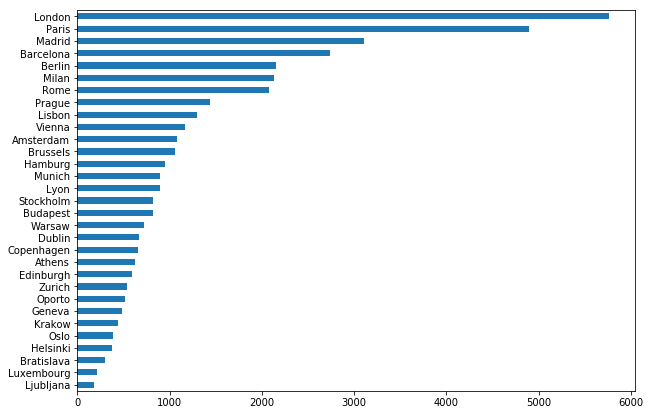

In [32]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

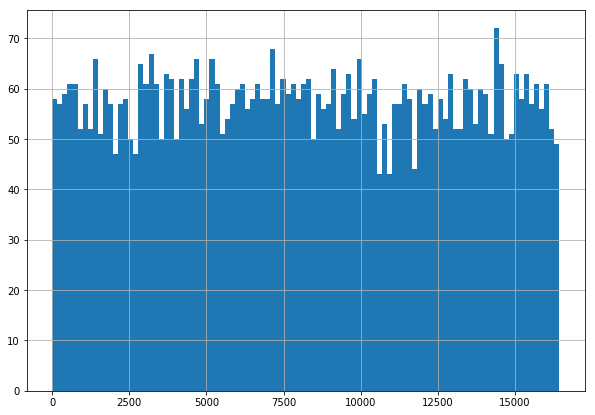

In [33]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

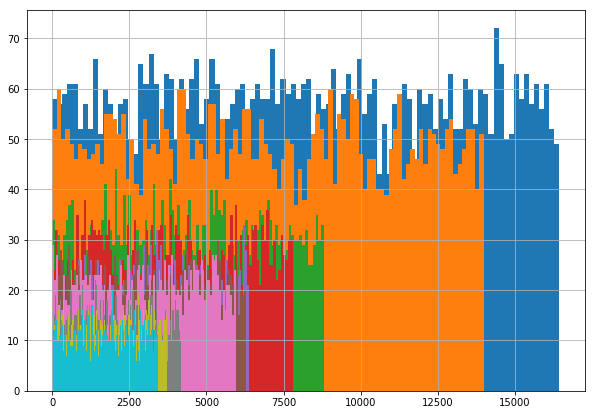

In [34]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

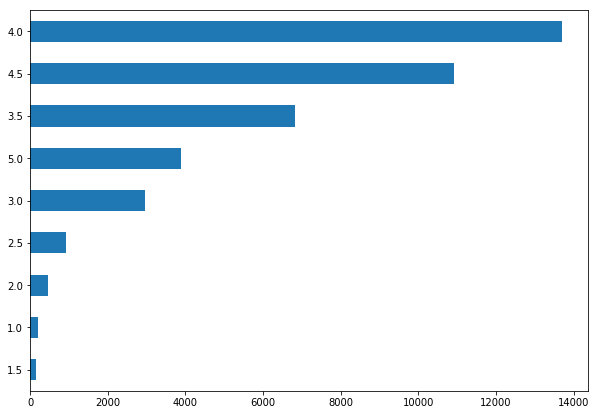

In [35]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

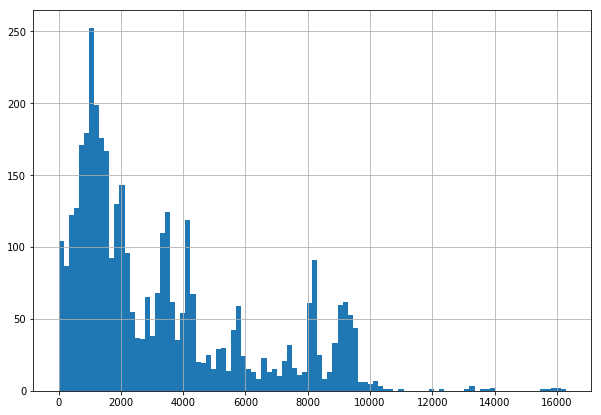

In [36]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

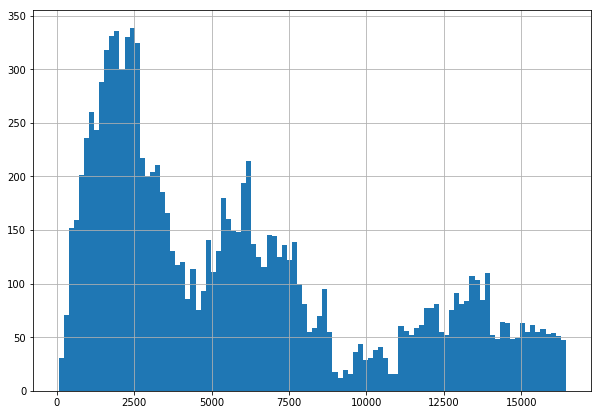

In [37]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

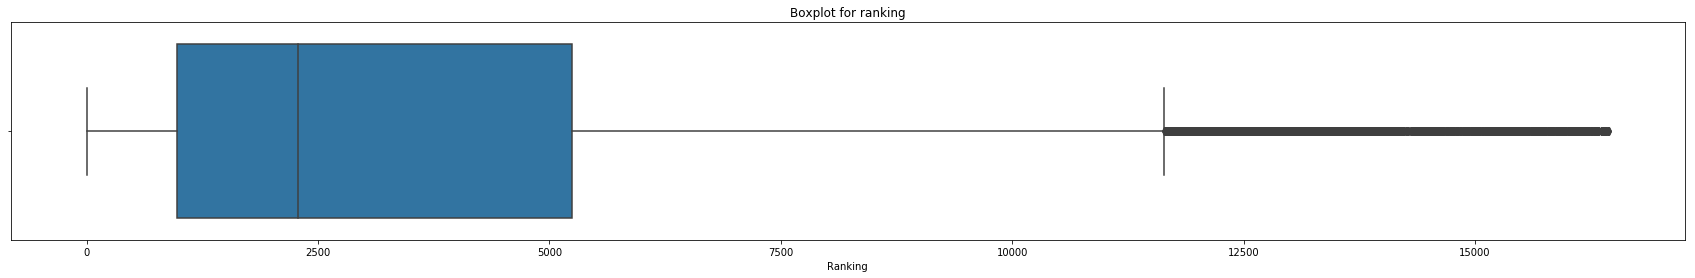

In [38]:
fig, ax = plt.subplots(figsize=(30, 4))
sns.boxplot(x='Ranking',data=data,ax=ax)
plt.xticks(rotation=0)
ax.set_title('Boxplot for ' + 'ranking')
plt.show()

In [39]:
# Создадим новый признак количество ресторанов в городе
city_counts_dict = dict(data['City'].value_counts())
data['rest_counts'] = data.City.map(city_counts_dict)

In [40]:
# Разделим Ranking — место, которое занимает данный ресторан среди всех ресторанов cвоего города на количество ресторанов(rest_counts), тем самым уберем смещение.
data['rank_city'] = data.Ranking / data.rest_counts

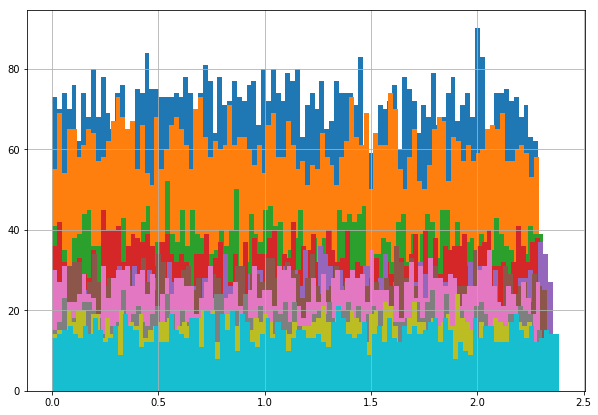

In [41]:
# Снова посмотрим на топ 10 городов
for x in (data['City'].value_counts())[0:10].index:
    data['rank_city'][data['City'] == x].hist(bins=100)
plt.show()

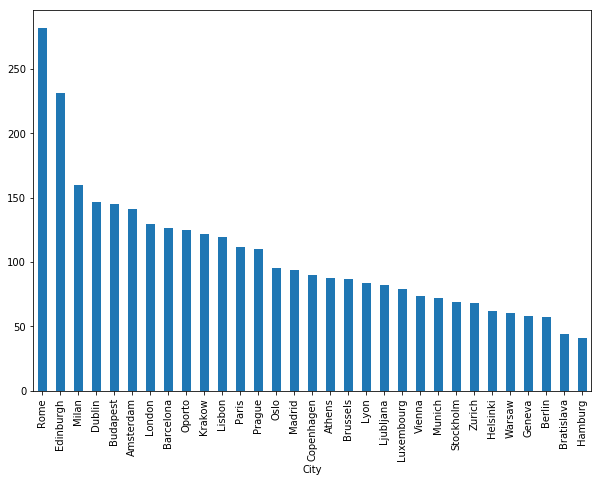

In [42]:
# Смотрим среднее количество отзывов по городам
data.groupby('City')['Number of Reviews'].mean().sort_values(ascending=False).plot(kind='bar')

In [43]:
#Создаем новый признак rew_rest_of_city - среднее количество отзывов о ресторанах города
dic_city = dict(data.groupby(['City'])['Number of Reviews'].mean())
data['rew_rest_of_city'] = data.City.map(dic_city)

In [44]:
data.head()

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,date_1,date_2,days,days_until_today,rest_counts,rank_city,rew_rest_of_city
0,id_0,Paris,"['Bar', 'Pub']",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,10746918,0,0.0,0,2017-02-23 19:43:37.621401344,2017-05-04 06:05:22.819055616,69,1627,6108,2.122299,111.464800
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2,97.0,"[[Very good reviews!, Fine dining in Hakaniemi...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,6674944,0,0.0,0,2017-10-29 00:00:00.000000000,2017-12-05 00:00:00.000000000,37,1412,475,0.223158,62.128421
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,2,28.0,"[[Better than the Links, Ivy Black], [12/28/20...",/Restaurant_Review-g186525-d13129638-Reviews-B...,13129638,0,0.0,0,2017-12-06 00:00:00.000000000,2017-12-28 00:00:00.000000000,22,1389,745,1.087248,231.010738
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3,202.0,"[[Most exquisite, Delicious and authentic], [1...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,680417,0,0.0,0,2017-11-22 00:00:00.000000000,2017-12-06 00:00:00.000000000,14,1411,7193,0.232031,129.816488
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3,162.0,"[[Always the best in bratislava, Very good but...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,1112354,0,0.0,0,2018-01-24 00:00:00.000000000,2018-02-08 00:00:00.000000000,15,1347,380,0.097368,43.873684


In [45]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
#data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [46]:
data.sample()

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,date_1,date_2,days,days_until_today,rest_counts,rank_city,rew_rest_of_city
5269,id_5269,Oporto,"['Barbecue', 'European', 'Portuguese']",1047.0,2,11.0,"[[], []]",/Restaurant_Review-g189180-d6767464-Reviews-Ch...,6767464,0,0.0,0,2017-02-23 19:43:37.621401344,2017-05-04 06:05:22.819055616,69,1627,642,1.630841,125.163551


In [47]:
сity_dummies = pd.get_dummies(data['City'], dummy_na=False).astype('float64')
data = pd.concat([data,сity_dummies], axis=1)

In [48]:
le = LabelEncoder()
le.fit(data['City'])
data['code_сity'] = le.transform(data['City'])

In [49]:
# создадим словарь с городами и населением в них (в млн. человек)
cities = list(sorted(data['City'].unique()))
population = [0.825080, 3.168846, 0.424819, 3.326002, 0.413192, 0.176545, 1.744665, 1.246611, 0.506211,
              0.482005, 0.198899, 1.718187, 0.574579, 0.756183, 0.547733, 0.277554, 8.538689, 0.214,
              0.506615, 3.155360, 1.331586, 1.561094, 0.258975, 0.673469, 2.148327, 1.272690,  2.870493,
              0.961609, 1.765649, 1.720398, 0.402275]
city_population_dict = dict(zip(cities, population))
data['city_population'] = data['City'].map(lambda x: city_population_dict[x])
# создадим признак количество ресторанов на 10_000 человек
data['restaurants_for_population'] = data['rest_counts'] / (data['city_population'] * 10_000)

In [50]:
# создадим словарь с городами и их площадью (в кв. км)
area = [219.4, 412, 101.3, 891.68, 368, 32.61, 525.14, 86.40, 318, 118, 15.93, 755.09, 213.8, 327, 100.05,
        163.8, 1572, 51.47, 47.87, 607, 181.67, 310.71, 41.66, 454, 105.4, 496, 1287.36, 188, 414.75, 517, 91.88]
city_area_dict = dict(zip(cities, area))
data['city_area'] = data['City'].map(lambda x: city_area_dict[x])
# создадим признак плотность ресторанов на кв.км
data['restaurant_density'] = data['rest_counts'] / data['city_area']

In [51]:
data.sample()

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Rome,Stockholm,Vienna,Warsaw,Zurich,code_сity,city_population,restaurants_for_population,city_area,restaurant_density
8238,id_8238,Rome,"['Italian', 'Pizza']",3515.0,2,288.0,"[[Been here hundred times, just love it, A lit...",/Restaurant_Review-g187791-d2384908-Reviews-Tr...,2384908,0,...,1.0,0.0,0.0,0.0,0.0,26,2.870493,0.090194,1287.36,2.011092


# cuisine style

In [52]:
# Заменим пробелы на 'other' и  удалим не нужные символы 
data['Cuisine Style'].fillna("['Other']", inplace=True)
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: eval(x)) # получили столбец со списками

In [53]:
# Соберем все рестораны в коллекцию. Она нам пригодится для создания новых признаков
coll = collections.Counter()
all_cuisune = set()
for row in data['Cuisine Style']:
  for i in row:
    coll[i] +=1
    all_cuisune.add(i)
all_cuisune_lst = list(all_cuisune)
print(len(coll)-1) # отнимем 'other'

125


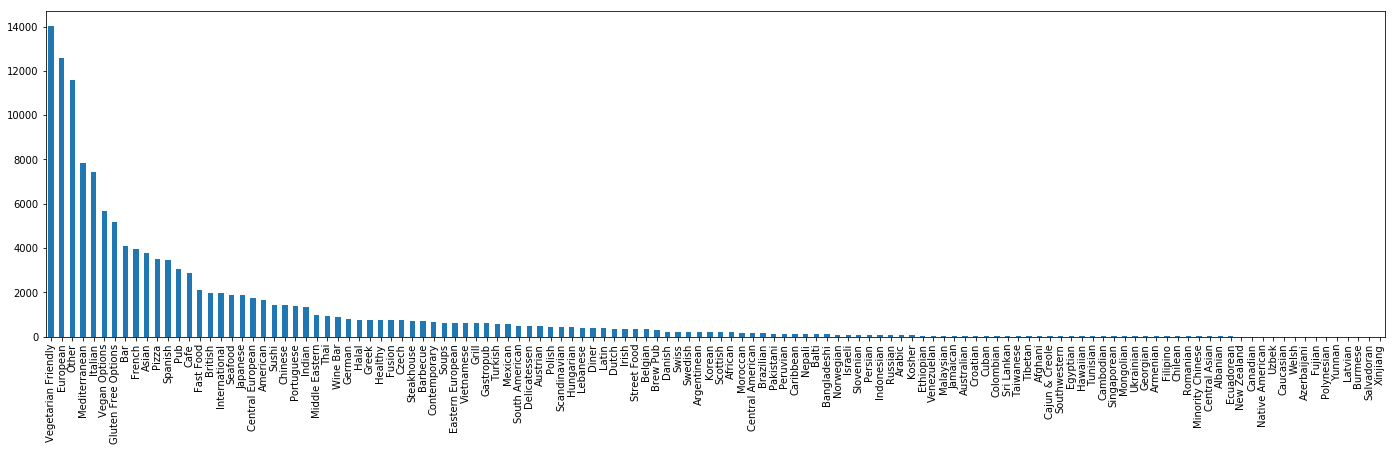

In [54]:
# график показывающий как часто встречается Cuisine style
plt.figure(figsize=(24,6))
data.explode('Cuisine Style')['Cuisine Style'].value_counts(ascending=False).plot(kind='bar');


In [55]:
#Уберем наименее распространенные кухни.
kitchen = dict(coll)
kitchen_300 = [i for i in kitchen if kitchen[i] > 300]
len(kitchen_300)

57

Создадим функцию которая будет проверять наличие конкретной кухни в столбце 'Cuisine Style' для текущего ресторана и возвращать 1, если кухня есть в ресторане, и 0, если отсутствует. Организуем цикл с параметром, в котором будем перебирать наименования всех кухонь (kitchen_300). Для каждой кухни создадим в датафрейме столбец с соответствующим названием и заполним его единичками и нулями, применив к столбцу 'Cuisine Style', функцию, созданную нами на предыдущем шаге.

In [56]:
def cuisine_iter(cell):
    if item in cell:
        return 1
    return 0

for item in kitchen_300:
    data[item] = data['Cuisine Style'].apply(cuisine_iter)

Кухонь которых меньше 300 закинем в один столбец для этого создадим функцию которая, будет возвращать количеств редких кухонь в каждом ресторане.

In [57]:
rare_cuisine = [i for i in kitchen if kitchen[i] <= 300]
def kitchen_count(cell):
    x = 0
    for i in rare_cuisine:
        if i in cell:
            x += 1
    return x
data['rare_cuisines'] = data['Cuisine Style'].apply(kitchen_count)

In [58]:
#преобразуем столбец Cuisine Style из списка кухонь в числовое значение равное их количеству 
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: len(x))

In [59]:
data.sample(10)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Gastropub,German,Contemporary,Diner,Grill,Mexican,Latin,Belgian,Delicatessen,rare_cuisines
30088,id_33,Budapest,7,34.0,2,224.0,"[[Loved it!, Great atmosphere, average food], ...",/Restaurant_Review-g274887-d11903781-Reviews-B...,11903781,1,...,0,0,0,0,0,0,0,0,0,0
1095,id_1095,Geneva,1,950.0,2,13.0,"[[This restaurant is a sure value, Nice for an...",/Restaurant_Review-g188057-d4295446-Reviews-Ja...,4295446,0,...,0,0,0,0,0,0,0,0,0,0
23652,id_2399,Vienna,1,2401.0,2,4.0,"[[too crowded and too trendy], [02/11/2015]]",/Restaurant_Review-g190454-d2046172-Reviews-Su...,2046172,1,...,0,0,0,0,0,0,0,0,0,0
15379,id_3763,Milan,1,3765.0,2,16.0,"[[Good food, very fair prices], [09/13/2015]]",/Restaurant_Review-g187849-d8134063-Reviews-Al...,8134063,1,...,0,0,0,0,0,0,0,0,0,0
46087,id_2097,Paris,3,2098.0,2,33.0,"[[], []]",/Restaurant_Review-g187147-d6890507-Reviews-Pe...,6890507,1,...,0,0,0,0,0,0,0,0,0,0
29662,id_10759,Paris,1,10761.0,2,2.0,"[[], []]",/Restaurant_Review-g187147-d8814581-Reviews-Da...,8814581,1,...,0,0,0,0,0,0,0,0,0,0
25714,id_13941,London,1,13951.0,2,3.0,"[[Typical TGI, Standard TGI Fare], [12/29/2017...",/Restaurant_Review-g186338-d12870241-Reviews-T...,12870241,1,...,0,0,0,0,0,0,0,0,0,0
12477,id_1137,Budapest,4,1138.0,2,142.0,"[[Good. Repeatable, Really lovely dal makhani]...",/Restaurant_Review-g274887-d1188540-Reviews-De...,1188540,1,...,0,0,0,0,0,0,0,0,0,0
16278,id_5547,Barcelona,1,5548.0,1,16.0,"[[], []]",/Restaurant_Review-g187497-d10033972-Reviews-L...,10033972,1,...,0,0,0,0,0,0,0,0,0,0
32902,id_6777,London,5,6786.0,1,9.0,"[[Getting into tea, Amazing slice], [08/16/201...",/Restaurant_Review-g186338-d10779537-Reviews-Y...,10779537,1,...,0,0,0,0,0,0,0,0,0,0


### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

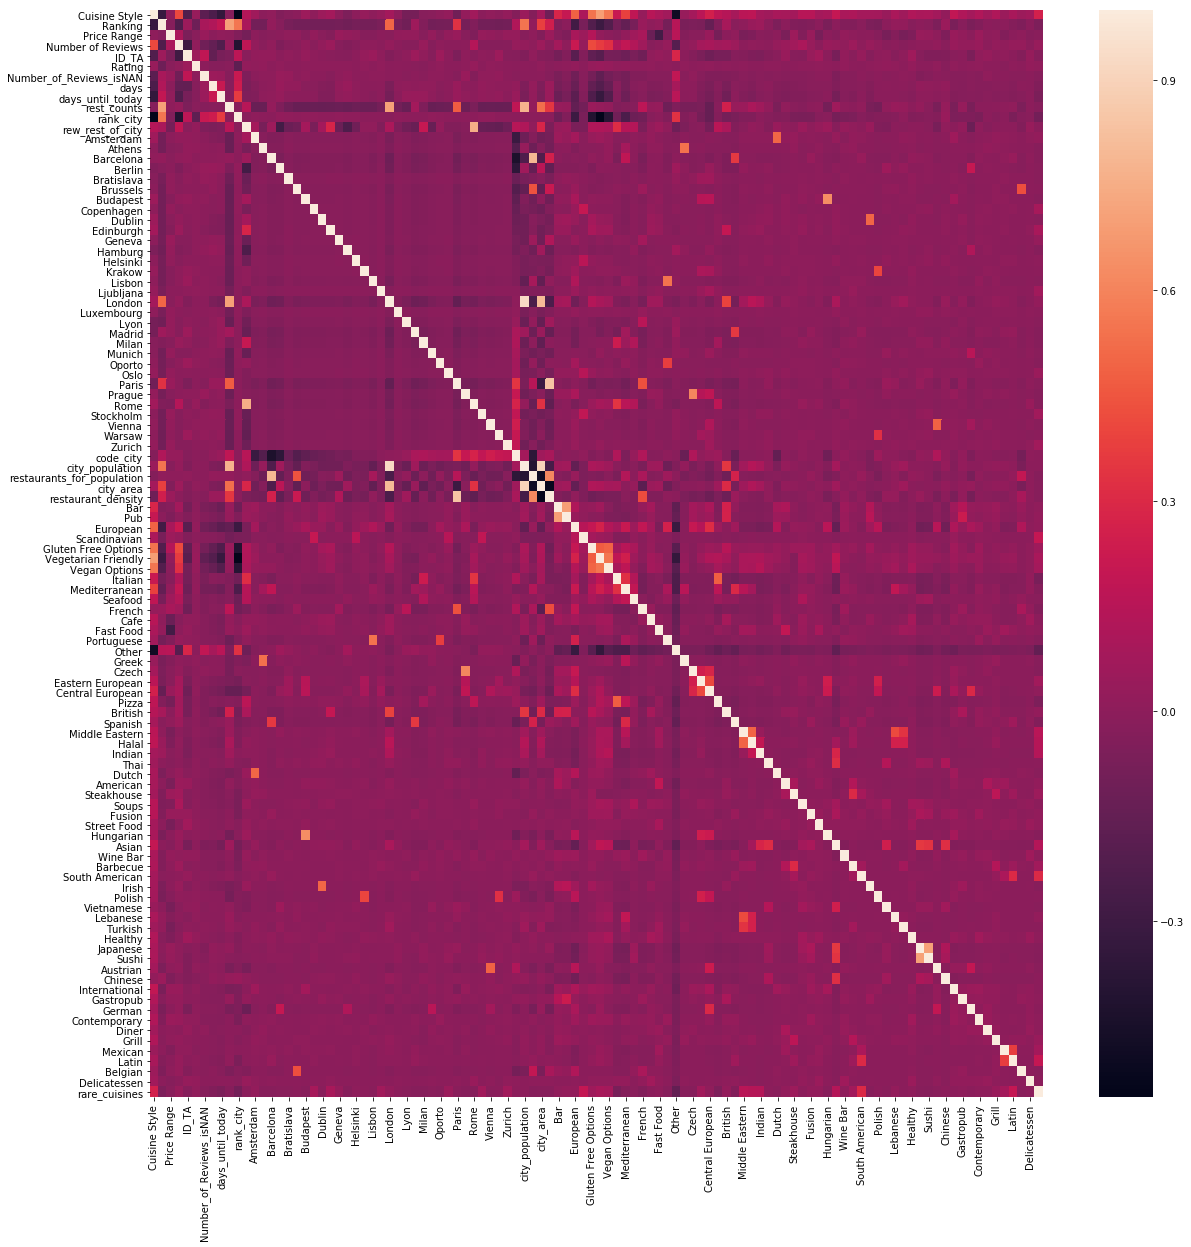

In [60]:
plt.rcParams['figure.figsize'] = (20,20)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

Теперь отберем столбцы класса object datetime64 и удалим из датафрейма

In [61]:
selected_dtype_obj = data.select_dtypes(include=['object', 'datetime64']).columns
selected_dtype_obj

Index(['Restaurant_id', 'City', 'Reviews', 'URL_TA', 'date_1', 'date_2'], dtype='object')

In [62]:
data.drop(selected_dtype_obj, axis=1, inplace=True)

In [63]:
data.head()

,Cuisine Style,Ranking,Price Range,Number of Reviews,ID_TA,sample,Rating,Number_of_Reviews_isNAN,days,days_until_today,...,Gastropub,German,Contemporary,Diner,Grill,Mexican,Latin,Belgian,Delicatessen,rare_cuisines
0,2,12963.0,2,4.0,10746918,0,0.0,0,69,1627,...,0,0,0,0,0,0,0,0,0,0
1,5,106.0,2,97.0,6674944,0,0.0,0,37,1412,...,0,0,0,0,0,0,0,0,0,0
2,1,810.0,2,28.0,13129638,0,0.0,0,22,1389,...,0,0,0,0,0,0,0,0,0,0
3,5,1669.0,3,202.0,680417,0,0.0,0,14,1411,...,0,0,0,0,0,0,0,0,0,0
4,6,37.0,3,162.0,1112354,0,0.0,0,15,1347,...,0,0,0,0,0,0,0,0,0,0


In [64]:
# Смотрим на пропущенные значения
data.isnull().sum()

Cuisine Style        0
Ranking              0
Price Range          0
Number of Reviews    0
ID_TA                0
                    ..
Mexican              0
Latin                0
Belgian              0
Delicatessen         0
rare_cuisines        0
Length: 107, dtype: int64

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 107 entries, Cuisine Style to rare_cuisines
dtypes: float64(40), int64(66), uint8(1)
memory usage: 40.5 MB


In [66]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [67]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [68]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 106), (40000, 106), (40000, 105), (32000, 105), (8000, 105))

# Model 
Сам ML

In [69]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [70]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [71]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   16.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [72]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.196184375


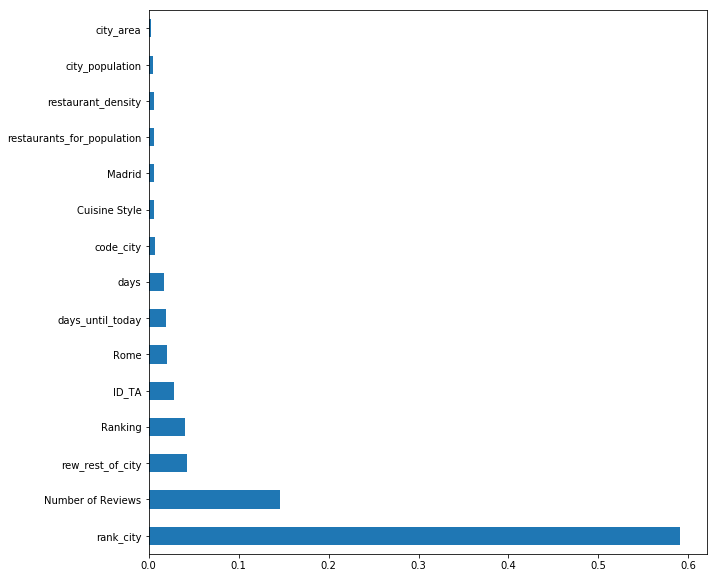

In [73]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [74]:
test_data.head(10)

,Cuisine Style,Ranking,Price Range,Number of Reviews,ID_TA,Rating,Number_of_Reviews_isNAN,days,days_until_today,rest_counts,...,Gastropub,German,Contemporary,Diner,Grill,Mexican,Latin,Belgian,Delicatessen,rare_cuisines
0,2,12963.0,2,4.0,10746918,0.0,0,69,1627,6108,...,0,0,0,0,0,0,0,0,0,0
1,5,106.0,2,97.0,6674944,0.0,0,37,1412,475,...,0,0,0,0,0,0,0,0,0,0
2,1,810.0,2,28.0,13129638,0.0,0,22,1389,745,...,0,0,0,0,0,0,0,0,0,0
3,5,1669.0,3,202.0,680417,0.0,0,14,1411,7193,...,0,0,0,0,0,0,0,0,0,0
4,6,37.0,3,162.0,1112354,0.0,0,15,1347,380,...,0,0,0,0,0,0,0,0,0,0
5,3,5093.0,1,24.0,8458643,0.0,0,5,1501,6108,...,0,0,0,0,0,0,0,0,0,0
6,2,3704.0,1,2.0,8758873,0.0,0,69,1627,1647,...,0,0,0,0,0,0,0,0,0,0
7,1,2330.0,2,0.0,8286886,0.0,1,69,1627,1021,...,0,0,0,0,0,0,0,0,0,0
8,2,771.0,2,2.0,12947542,0.0,0,88,1379,475,...,0,0,0,0,0,0,0,0,0,0
9,1,605.0,2,13.0,12716384,0.0,0,34,1415,1033,...,0,0,0,0,0,0,0,0,0,0


In [75]:
test_data = test_data.drop(['Rating'], axis=1)

In [76]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [77]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [78]:
predict_submission

array([3.015, 4.175, 4.51 , ..., 3.015, 4.495, 4.245])

In [79]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.015
1,id_1,4.175
2,id_2,4.510
3,id_3,4.390
4,id_4,4.430
5,id_5,4.450
6,id_6,2.015
7,id_7,2.375
8,id_8,4.060
9,id_9,4.550


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
